### Generating Text with Neural Networks

In [1]:
#importing libraries

import tensorflow as tf
import numpy as np

##### Building the word vocabulary

The dataset is the lyrics of Lanigan's Ball, a traditional Irish song. Let's split it per line.

In [2]:
#define the lyrics of the song
data = "In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."

#spilitting the long string per line and put in a list
corpus = data.split("\n")

#preview the results
corpus[:2]

['In the town of Athy one Jeremy Lanigan ',
 ' Battered away til he hadnt a pound. ']

In [3]:
#initialize the vectorization layer
vectorize_layer = tf.keras.layers.TextVectorization()

#build the vocabulary
vectorize_layer.adapt(corpus)

In [4]:
#getting the vocabulary and it's size
vocabulary = vectorize_layer.get_vocabulary()
vocab_size = len(vocabulary)

print(f"{vocabulary}")
print(f"{vocab_size}")

['', '[UNK]', np.str_('and'), np.str_('the'), np.str_('a'), np.str_('in'), np.str_('all'), np.str_('i'), np.str_('for'), np.str_('of'), np.str_('lanigans'), np.str_('ball'), np.str_('were'), np.str_('at'), np.str_('to'), np.str_('stepped'), np.str_('she'), np.str_('they'), np.str_('his'), np.str_('girls'), np.str_('as'), np.str_('weeks'), np.str_('up'), np.str_('til'), np.str_('three'), np.str_('there'), np.str_('that'), np.str_('round'), np.str_('out'), np.str_('her'), np.str_('he'), np.str_('got'), np.str_('boys'), np.str_('again'), np.str_('was'), np.str_('steps'), np.str_('spent'), np.str_('new'), np.str_('long'), np.str_('learning'), np.str_('him'), np.str_('when'), np.str_('wall'), np.str_('tipped'), np.str_('time'), np.str_('them'), np.str_('their'), np.str_('soon'), np.str_('relations'), np.str_('put'), np.str_('old'), np.str_('nice'), np.str_('myself'), np.str_('miss'), np.str_('merry'), np.str_('me'), np.str_('leg'), np.str_('left'), np.str_('just'), np.str_('from'), np.str_(

##### Preprocessing the dataset

we will take each line of the song and create inputs and labels from it. For example, if we only have one sentence: "I am using Tensorflow", we want the model to learn the next word given any subphrase of this sentence:

1. I             ---> am
2. I am          ---> using
3. I am using    ---> Tensorflow

In [6]:
#initialize the sequence list
input_sequences=[]

#loop over every line
for line in corpus:

    #generate the sequence of the current line
    sequence = vectorize_layer(line).numpy()

    #loop over the line several times to generate the subphrases
    for i in range(len(sequence)):

        #generating the subphrase
        n_gram_sequence = sequence[:i+1]

        #appending the subphrase to the sequence list
        input_sequences.append(n_gram_sequence)

#getting the length of longest line
max_sequence_len = max(len(x) for x in input_sequences)   

#padding all the sequences
input_sequences = np.array(tf.keras.utils.pad_sequences(input_sequences, padding="pre", maxlen=max_sequence_len))

#creating inputs and label by splitting the last token in the subphrases
xs, labels = input_sequences[:, :-1], input_sequences[:, -1]

#converting the label into one-hot arrays
ys = tf.keras.utils.to_categorical(labels,num_classes=vocab_size )



checking the results on first line of the song.

In [17]:
#getting sample sequence
sentence = corpus[0].lower().split()
print(f"sample sentence: {sentence}")

#initialize token list
token_list = []

#look up the indices of each word and append to the list
for word in sentence:
    token_list.append(vocabulary.index(word))

#print the token list
token_list    



sample sentence: ['in', 'the', 'town', 'of', 'athy', 'one', 'jeremy', 'lanigan']


[5, 3, 83, 9, 255, 140, 183, 174]

In [18]:
def sequence_to_text(sequence, vocabulary):
    "utitlity to convert integer sequence back to text"

    #loop through integer sequence and look up the word from vocabulary
    words = [vocabulary[index] for index in sequence]

    #combine the words to form sentence
    text = tf.strings.reduce_join(words, separator=" ").numpy().decode()

    return text

In [19]:
#picking a sample
elem_number = 6

#print token list and phrase
print(f"token list: {xs[elem_number]}")
print(f"decoded text: {sequence_to_text(xs[elem_number], vocabulary)}")

token list: [  0   0   0   0   5   3  83   9 255 140]
decoded text:     in the town of athy one


In [20]:
#print label
print(f"one-hot label: {ys[elem_number]}")
print(f"index of label: {np.argmax(ys[elem_number])}")

one-hot label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
index of label: 183


##### Building the model

In [21]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(max_sequence_len-1,)),
    tf.keras.layers.Embedding(vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(vocab_size, activation="sigmoid")
])

model.compile(optimizer="adam",
loss="categorical_crossentropy",
metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 10, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 40)             │        13,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 264)            │        10,824 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,320 (161.41 KB)

 Trainable params: 41,320 (161.41 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
#model training

history = model.fit(xs, ys, epochs=500)

Epoch 1/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0193 - loss: 5.5718  
Epoch 2/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0522 - loss: 5.5377 
Epoch 3/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0484 - loss: 5.4218 
Epoch 4/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0522 - loss: 5.2114 
Epoch 5/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0600 - loss: 5.0999 
Epoch 6/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0580 - loss: 5.0536 
Epoch 7/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0484 - loss: 5.0293 
Epoch 8/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0600 - loss: 5.0034 
Epoch 9/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0619 - loss: 4.9764 
Epoch 10/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0638 - loss: 4.9461 
Epoch 11/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0735 - loss: 4.9153 
Epoch 12/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

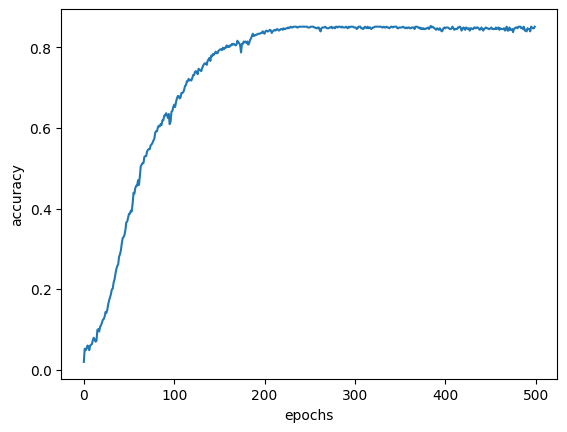

In [24]:
import matplotlib.pyplot as plt

#plot utility
def plot_graph(history, string):
    plt.plot(history.history[string])
    plt.xlabel("epochs")
    plt.ylabel(string)
    plt.show()

#visualizing the accuracy
plot_graph(history, 'accuracy')    

##### Generating text

With the trained model, we can now use it to make own song.
The process is as follows:
* Feed a seed text to initiate the process.
* Model predicts the index of the most probable next word.
* Look up the index in the reverse word index dictionary
* Append the next word to the seed text.
* Feed the result to the model again.

Steps 2 to 5 will repeat until the desired length of the song is reached. 


In [27]:
#define seed text

seed_text = "John went to Dublin"

#define total words to predict
next_words = 100

#loop until desired length is reached

for _ in range(next_words):

    #convert seed text into integer token
    sequence = vectorize_layer(seed_text)

    #pad the sequence
    sequence = tf.keras.utils.pad_sequences([sequence], padding="pre", maxlen=max_sequence_len-1)

    #feed to the model and get the probabilities for each index
    probabilities = model.predict(sequence, verbose=False)

    #get the index of highest probability
    predicted = np.argmax(probabilities, axis=-1)[0]

    #ignore if index is 0, since it is just padding
    if predicted !=0:

        #loop up the word assciated with the index
        output_word = vocabulary[predicted]

        #combine with seed text
        seed_text += " " + output_word

#print the result
print(seed_text)        





John went to Dublin round friends a whirligig whirligig cask by them the wall wall wall wall table table jig jig glisten glisten call call brooks suppose suppose suppose suppose glisten glisten call call brooks suppose suppose suppose suppose glisten glisten call call brooks suppose suppose suppose suppose glisten glisten call call brooks suppose suppose suppose suppose glisten glisten call call brooks suppose suppose suppose suppose glisten glisten call call brooks suppose suppose suppose suppose glisten glisten call call brooks suppose suppose suppose suppose glisten glisten call call brooks suppose suppose suppose suppose glisten glisten call call brooks suppose suppose suppose suppose glisten glisten


In the output above, we got frequent repetition of words the longer the sentence gets. There are ways to get around it and the next cell shows one. Basically, instead of getting the index with max probability, we can get the top three indices and choose one at random.Let's see if the output text makes more sense with this approach. This is not the most time efficient solution because it is always sorting the entire array even if we only need the top three.

In [28]:
#define seed text
seed_text = "Sam came to India"

#define word length to predict
next_words = 100

#loop until word length is reached
for _ in range(next_words):

    #sequence of seed_text
    sequence = vectorize_layer(seed_text)

    #padding the sequence
    sequence = tf.keras.utils.pad_sequences([sequence], padding="pre", maxlen=max_sequence_len-1)

    #probabilities from model
    probabilities = model.predict(sequence, verbose=False)

    #pick a random number from 1, 2, 3
    choice = np.random.choice([1,2,3])

    #sort probabilities in ascending order
    #and get the random choice from the end of the array
    predicted = np.argsort(probabilities)[0][choice]

    if predicted != 0:

        #word lookup from vocabulary    
        output_word = vocabulary[predicted]

        #combine with the seed text
        seed_text += " "+ output_word

#print the result
print(seed_text)        




Sam came to India arrived mavrone died long arrived swore away father finnertys gathered invitation mavrone father catchers in in lashings and mavrone his round for forget call painted at father lanigan phelim together happened went them sure right saw right me in and father suppose out call call rat saw mavrone father youll them father eyes nelly odaly a swore round father rose father young forget jig jig mavrone jig right them forget being i bellows in boys them out entangled were in in ned tipped were saw father glisten finnertys were all i father casey entangled odaly died mavrone sure ned sweetheart
